## 1. Cross-validation for nearest neighbor classification.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataframe = read_csv('wine.data', header = None, sep = ',')
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Separate features from labels 
data = dataframe.values
X, y = data[:, 1:], data[:, 0]

### (a) Use leave-one-out cross-validation (LOOCV) to estimate the accuracy of the classifier and also to estimate the 3 × 3 confusion matrix.

In [4]:
loo = LeaveOneOut()
predict_values = []

for train_ix, test_ix in loo.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    neigh = KNeighborsClassifier(n_neighbors = 1)
    neigh.fit(X_train, y_train)   
    predict_labels = neigh.predict(X_test)
    predict_values.append(predict_labels)

In [5]:
predict_values = np.asarray(predict_values)
predict_values = predict_values.reshape(178,)

accuracy = accuracy_score(y, predict_values)
print("Accuracy rate:\n", accuracy)

Accuracy rate:
 0.7696629213483146


In [6]:
print('Confusion matrix:\n', confusion_matrix(y, predict_values))

Confusion matrix:
 [[52  3  4]
 [ 5 54 12]
 [ 3 14 31]]


### (b) Estimate the accuracy of the 1-NN classifier using k-fold cross-validation using 20 different choices of k that are fairly well spread out across the range 2 to 100. Plot these estimates: put k on the horizontal axis and accuracy estimate on the vertical axis.

k= 2

Avg accuracy : 0.6629213483146068

k= 7

Avg accuracy : 0.7637362637362637

k= 12

Avg accuracy : 0.7702380952380955

k= 17

Avg accuracy : 0.756149732620321

k= 22

Avg accuracy : 0.7651515151515152

k= 27

Avg accuracy : 0.7707231040564373

k= 32

Avg accuracy : 0.7656250000000003

k= 37

Avg accuracy : 0.7702702702702705

k= 42

Avg accuracy : 0.7726190476190476

k= 47

Avg accuracy : 0.7695035460992907

k= 52

Avg accuracy : 0.7644230769230769

k= 57

Avg accuracy : 0.7690058479532165

k= 62

Avg accuracy : 0.7715053763440861

k= 67

Avg accuracy : 0.7810945273631842

k= 72

Avg accuracy : 0.777777777777778

k= 77

Avg accuracy : 0.7662337662337663

k= 82

Avg accuracy : 0.7764227642276422

k= 87

Avg accuracy : 0.7662835249042145

k= 92

Avg accuracy : 0.7608695652173914

k= 97

Avg accuracy : 0.7577319587628866



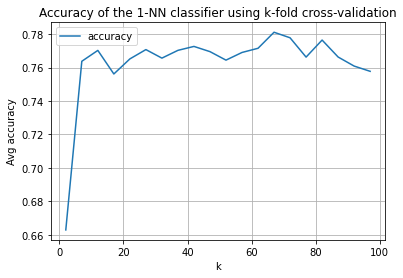

In [7]:
plot_data = []

for k in range(2, 100, 5): 
    kf = KFold(n_splits = k, shuffle = True)
    acc_score = []

    for train_index, test_index in kf.split(X):
        kf_predict_values = []
        X_train_kf, X_test_kf = X[train_index, :], X[test_index, :]
        y_train_kf, y_test_kf = y[train_index], y[test_index]
        
        kf_neigh = KNeighborsClassifier(n_neighbors = 1)
        kf_neigh.fit(X_train_kf, y_train_kf)   
        kf_predict_labels = kf_neigh.predict(X_test_kf)
        acc = accuracy_score(y_test_kf, kf_predict_labels)
        
        kf_predict_values.append(kf_predict_labels)
        acc_score.append(acc)

    avg_acc_score = sum(acc_score)/k
    plot_data.append(avg_acc_score)
    print('k=', k)
    print('\nAvg accuracy : {}\n'.format(avg_acc_score))

t = np.arange(2, 100, 5)
plt.xlabel('k')
plt.ylabel('Avg accuracy')
plt.title('Accuracy of the 1-NN classifier using k-fold cross-validation')
plt.plot(t, plot_data, label = 'accuracy')
plt.legend()
plt.grid()
plt.show()

### (c) The various features in this data set have different ranges. Perhaps it would be better to normalize them so as to equalize their contributions to the distance function. There are many ways to do this; one option is to linearly rescale each coordinate so that the values lie in [0,1] (i.e. the minimum value on that coordinate maps to 0 and the maximum value maps to 1). Do this, and then re-estimate the accuracy and confusion matrix using LOOCV. Did the normalization help performance?

In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
loo = LeaveOneOut()
predict_values = []
for train_ix, test_ix in loo.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    neigh = KNeighborsClassifier(n_neighbors = 1)
    neigh.fit(X_train, y_train)   
    predict_labels = neigh.predict(X_test)
    predict_values.append(predict_labels)

In [10]:
predict_values = np.asarray(predict_values)
predict_values = predict_values.reshape(178,)

acc = accuracy_score(y, predict_values)
print("\nAccuracy rate:\n", acc)


Accuracy rate:
 0.949438202247191


In [11]:
print('Confusion matrix:\n', confusion_matrix(y, predict_values))

Confusion matrix:
 [[59  0  0]
 [ 5 62  4]
 [ 0  0 48]]


### Yes, the normalization helps improve performance.